In [1]:
%load_ext autoreload
%autoreload 2

from cnn import CNN
from experiment import Experiment
from util import Util
from patch import Patch
from fixer import Fixer
from uglify import Uglify

from PIL import Image
import mahotas as mh
import numpy as np
import os
import cPickle as pickle
from string import Template
import shutil

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [5]:
new_vi_s = [0.34444588423210565,
 0.3494130980745487,
 0.36852680878600985,
 0.3525806949682888,
 0.3583411902934417,
 0.34808529826107115,
 0.37099708179435265,
 0.42902103175275563,
 0.4210100052944865,
 0.5668957367919436,
 0.5786151970899134,
 0.583354701109899,
 0.5424558810837636,
 0.534516149073597,
 0.5161487297479468,
 0.5825041707714922,
 0.5211479464868978,
 0.517100097814513,
 0.4319018517780826,
 0.4015664491078841,
 0.3976883640383919,
 0.3583175348487462,
 0.3750050016328714,
 0.44067643363945574,
 0.40505062514543155,
 0.43511197632534415,
 0.4085577406813954,
 0.49580841484870763,
 0.4775465563696599,
 0.48577716844228913,
 0.47238793842898996,
 0.3899601150077263,
 0.4940350388982111,
 0.43237112882905926,
 0.47526195398406035,
 0.4258438447196582,
 0.4355123745931495,
 0.48951717915915083,
 0.5471859700647723,
 0.5050240660223881,
 0.4828720566736395,
 0.5132941266342606,
 0.42564025866750654,
 0.45942124752294156,
 0.4418707881672983,
 0.40706103676697847,
 0.4019499447971109,
 0.326649390787201,
 0.2032815684449769,
 0]

In [4]:
old_vi_s = [0.3786148741101423,
 0.3761501140647132,
 0.4031926858768182,
 0.37049672738135264,
 0.37238460424387654,
 0.3711915345751171,
 0.40139968495919387,
 0.4534873759514335,
 0.4441442630328494,
 0.5999736048205211,
 0.6077716223946172,
 0.6173012197474161,
 0.5805559290539115,
 0.5543984150075865,
 0.5719072147521285,
 0.5993340419822832,
 0.5551152662894978,
 0.5480016636216476,
 0.4780318944933022,
 0.4522066919014369,
 0.44246598501764556,
 0.41700371365664424,
 0.4369653463293748,
 0.47284830139521095,
 0.43956945102592115,
 0.49491078801993726,
 0.4839171653282275,
 0.5150010785488455,
 0.5118651977945907,
 0.5672878325228838,
 0.5321505238948419,
 0.4289517279045265,
 0.5053088300883335,
 0.5021617471945685,
 0.5461621705031456,
 0.46998769725829526,
 0.4799175717955375,
 0.5621809899827044,
 0.6252930726453725,
 0.5515062465031129,
 0.5195338423351847,
 0.526627952918548,
 0.4608329396192463,
 0.48441914645616,
 0.4504479420736729,
 0.4118202313464083,
 0.40229724602881056,
 0.32739498113082055,
 0.2032815684449769,
 0]

In [6]:
before_vi_s = [0.37294998439310856,
 0.37570219661839666,
 0.4109658438387207,
 0.37393428510508553,
 0.3762287531092978,
 0.37385760820585645,
 0.4014037597672475,
 0.4554609382482129,
 0.44628578370391203,
 0.6030340271019625,
 0.6163519590275044,
 0.6087015023726021,
 0.5919024759227103,
 0.5605457129847213,
 0.5705925664914542,
 0.5952651035175354,
 0.5795615981375537,
 0.5594166501537927,
 0.49946323720437213,
 0.44618979740162246,
 0.4548631943347914,
 0.42050231396302173,
 0.4385921810227087,
 0.4705584345378737,
 0.4330805382494942,
 0.527164362396328,
 0.4988453695588202,
 0.5251819097450561,
 0.5307623709392573,
 0.5755674642935071,
 0.5496714227025956,
 0.4308503204354386,
 0.5024395754252415,
 0.4989349104857448,
 0.5461621705031456,
 0.48507618715427103,
 0.4800801727583428,
 0.5620959866608635,
 0.6353546903196463,
 0.5627896696766568,
 0.5247327438711675,
 0.5266254947401299,
 0.46047548986476716,
 0.48441914645616,
 0.4524912015296758,
 0.4118202313464083,
 0.40229724602881056,
 0.32739498113082055,
 0.2032815684449769,
 0.0]

In [15]:
new_sim_user = [0.37095217382355017,
 0.3734009898741375,
 0.40756873869895305,
 0.36776293625678225,
 0.3759834540484803,
 0.36779124780368466,
 0.39890467701099386,
 0.44844350571188496,
 0.4411967077891239,
 0.5957326383015307,
 0.5983145793575186,
 0.5887364325510518,
 0.5870299736616058,
 0.5454769197467524,
 0.5559007504749971,
 0.5923274528974289,
 0.5745816204774492,
 0.5497092357749018,
 0.4903541068341237,
 0.42528595211914144,
 0.4472384041936559,
 0.41224751668111814,
 0.43123033115152243,
 0.46293089005168664,
 0.4257582952779231,
 0.5157003059771554,
 0.49187802408204373,
 0.5184656997008625,
 0.5246791784860658,
 0.568430062470128,
 0.5414983408994152,
 0.425745730148952,
 0.4827125246880817,
 0.4989349104857448,
 0.517663437152776,
 0.4850150106665705,
 0.4768313747399908,
 0.5620959866608635,
 0.6334247185851591,
 0.5609270233049877,
 0.516790775720585,
 0.5266254947401299,
 0.46047548986476716,
 0.4792217602676221,
 0.44601155604026843,
 0.4118202313464083,
 0.40229724602881056,
 0.32739498113082055,
 0.2032815684449769,
 0.0]

In [21]:
new_sim_user_2h = [0.35957848610156695,
 0.35437182457468275,
 0.38622833991044025,
 0.3541290696094155,
 0.3616088278036935,
 0.3650177762367033,
 0.384011294650656,
 0.42615260230693774,
 0.42508117516937816,
 0.5744021856728638,
 0.5687526518286301,
 0.565240607472683,
 0.548845475712552,
 0.5364854512870707,
 0.5425257734104107,
 0.5802491570397841,
 0.5377020823038929,
 0.5291718092589779,
 0.46405330032796144,
 0.3794064511945763,
 0.41958082284516696,
 0.3943204342287867,
 0.39717527136608854,
 0.4502854736385311,
 0.40107106487648014,
 0.48948306672483266,
 0.4661033672983068,
 0.496811131762521,
 0.5101628027129879,
 0.546164447421563,
 0.5258567365941147,
 0.38621955432745736,
 0.4827332971997116,
 0.4687274720573589,
 0.5444963296735637,
 0.44374548502952216,
 0.4618314317179202,
 0.5251401082288893,
 0.6055454698728076,
 0.5209225230507624,
 0.5187698086794033,
 0.521111148563218,
 0.44012148385885386,
 0.4637510821272901,
 0.4524912015296758,
 0.41040184330556695,
 0.3936873211522416,
 0.32739498113082055,
 0.2032815684449769,
 0.0]

In [18]:
old_sim_user = [0.365297941004596,
 0.37332765466660334,
 0.3983001724345572,
 0.372023316562343,
 0.3709848297623539,
 0.37133308165057244,
 0.39842326245250437,
 0.45267898655934946,
 0.44352306077643977,
 0.5999395314374301,
 0.6109411148192354,
 0.6023204063872765,
 0.5840082210880411,
 0.5566650544037905,
 0.569394433639518,
 0.5873613923724754,
 0.5697122461366817,
 0.5570423196873424,
 0.4910261156035798,
 0.4282754587212452,
 0.45288344931877145,
 0.41874279328141917,
 0.4369442000523778,
 0.4672160075154794,
 0.4250478310792447,
 0.5047155436788469,
 0.4826776224559506,
 0.5055445500487332,
 0.5024310789496313,
 0.5645769090369575,
 0.5431009539317859,
 0.4308503204354386,
 0.4940158996422994,
 0.48618053648446935,
 0.5461621705031456,
 0.4847246939200023,
 0.47905914770920344,
 0.5620959866608635,
 0.6348627124298467,
 0.5627896696766568,
 0.5247327438711675,
 0.5266254947401299,
 0.46047548986476716,
 0.48441914645616,
 0.4504479420736738,
 0.4118202313464083,
 0.40229724602881056,
 0.32739498113082055,
 0.2032815684449769,
 0.0]

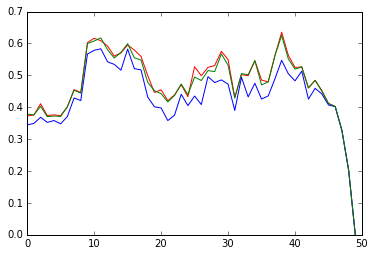

In [8]:
x_marks = range(50)
plt.plot(x_marks, before_vi_s, 'r', x_marks, new_vi_s, 'b', x_marks, old_vi_s, 'g')
plt.show()

In [10]:
print np.median(before_vi_s)
print np.median(new_vi_s)
print np.median(old_vi_s)

0.484747666805
0.433741552577
0.478974733144


In [11]:
median_input_vi = np.median(before_vi_s)

In [36]:
data = [before_vi_s, old_sim_user, new_sim_user, old_vi_s,  new_vi_s, ]

In [44]:
data = [before_vi_s, old_vi_s, new_vi_s]

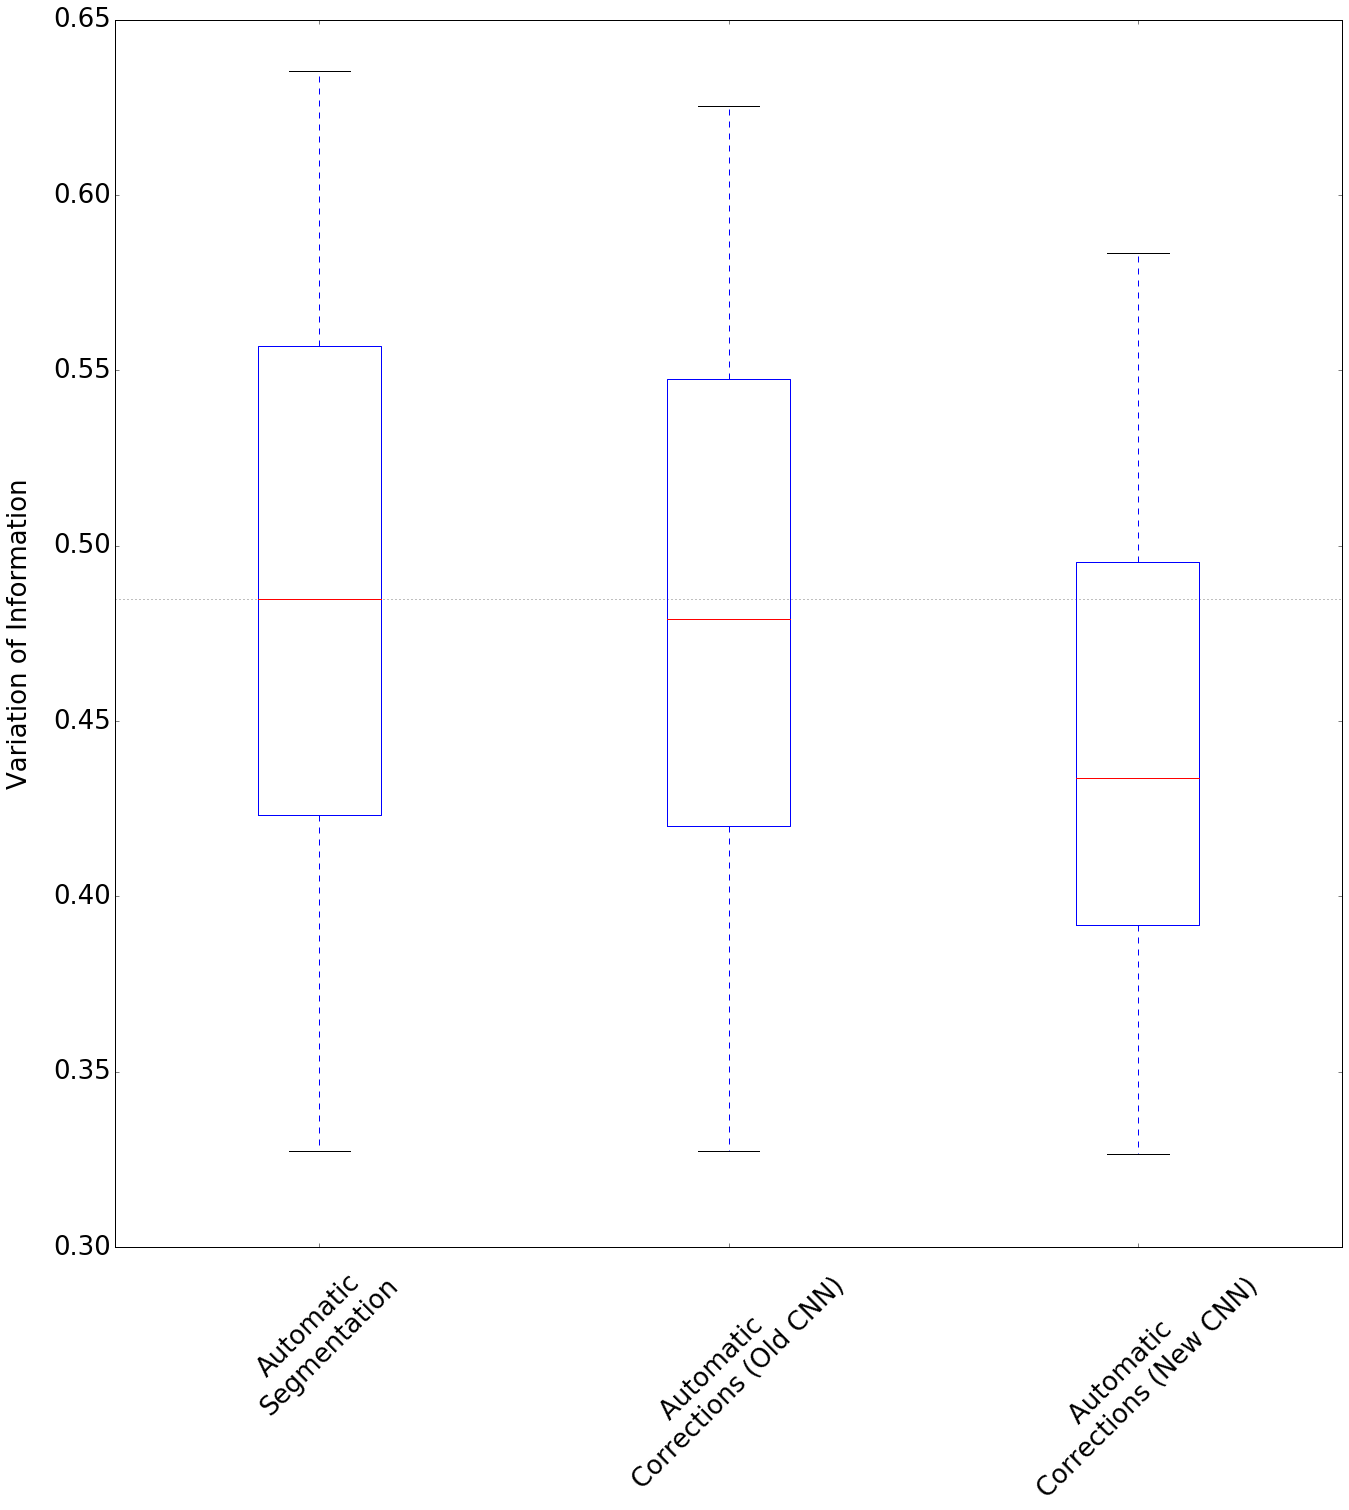

In [45]:
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(range(12), [median_input_vi]*12, 'k:' , color='gray', label='Avg. input VI')

objects = ['Automatic\nSegmentation',
#            'Simulated   \nUser   ',

#            'Simulated User \nafter 30 mins (Old CNN)',        
#            'Simulated User \nafter 30 mins (New CNN)',           
#            'Sim. User after 2h (New CNN)',           
               
           'Automatic  \nCorrections (Old CNN)',
           'Automatic  \nCorrections (New CNN)',           
]

y_pos = range(1,len(objects)+1)


plt.ylabel('Variation of Information', labelpad=20)

plt.setp(plt.xticks()[1], rotation=45)

font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
plt.boxplot(data, 0, 'gD', whis=1.5 ,showfliers=False)
plt.xticks(y_pos, objects)
# plt.savefig('/tmp/out_limit.pdf')

plt.show()

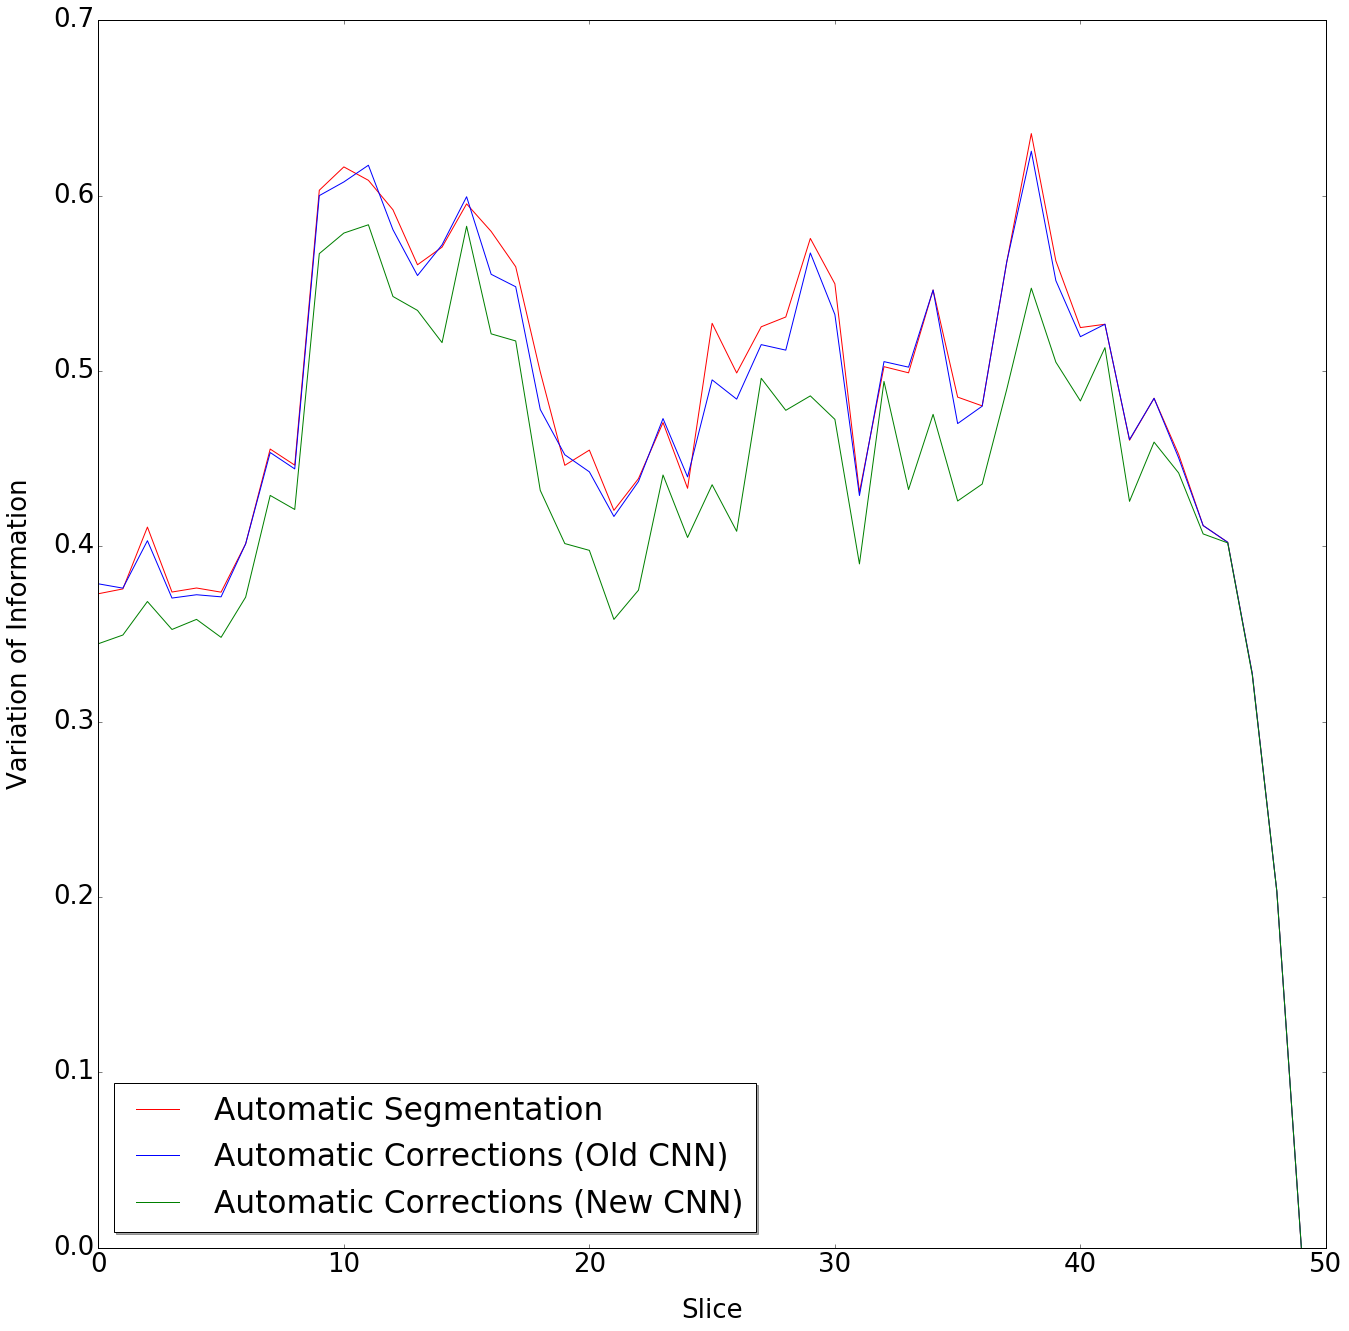

In [41]:
fig, ax = plt.subplots(figsize=(22,22))

x_marks = range(50)
ax.plot(x_marks, before_vi_s, 'r', label='Automatic Segmentation')

# fig, ax = plt.subplots()
ax.plot(x_marks, old_vi_s, color='b', label='Automatic Corrections (Old CNN)')
ax.plot(x_marks, new_vi_s, color='g', label='Automatic Corrections (New CNN)')
# ax.plot(x_marks, john_new_vi, color='r')
# ax.plot(x_marks, josh_new_vi, color='b')
plt.ylabel('Variation of Information', labelpad=20)

plt.xlabel('Slice', labelpad=20)

# ax.plot(x_marks, alyssa_new_vi, color='r')
legend = ax.legend(loc='lower left', shadow=True)

# plt.plot()
plt.show()

In [46]:
new_sim_user_24h = [0.3126860168690291,
 0.3176697482932056,
 0.3302104193741373,
 0.31483383687785604,
 0.31210496689256306,
 0.32538244666561766,
 0.33962959140397153,
 0.39714131759305005,
 0.3624404880151362,
 0.5284855112358224,
 0.5075131931806709,
 0.5115734091636099,
 0.5103020463891603,
 0.4977703109749534,
 0.4926450576369614,
 0.5049320666380162,
 0.4969231222214763,
 0.46218377125609234,
 0.40691808196112866,
 0.32553562981665163,
 0.36505942450307316,
 0.3391962828418027,
 0.3521595516324689,
 0.38656325250959167,
 0.3482572675026949,
 0.4131306750112005,
 0.39317896321270407,
 0.42250609975853504,
 0.4373989149095605,
 0.44620685433280105,
 0.43926308338379894,
 0.36321083244825303,
 0.43123766723319257,
 0.41274221676600753,
 0.4562503567596403,
 0.3896619840792157,
 0.4374606477905001,
 0.4504661699145842,
 0.5297067759929899,
 0.49245128232290813,
 0.4593740616109674,
 0.4471210637864287,
 0.4142923323784977,
 0.4638166258738714,
 0.4284947674868276,
 0.3979622656067985,
 0.38762535407029386,
 0.32193777828976256,
 0.2032815684449769,
 0.0]

In [51]:
np.median(new_sim_user_24h)

0.41293644588860401

In [47]:
data = [before_vi_s, new_sim_user_24h, new_vi_s]

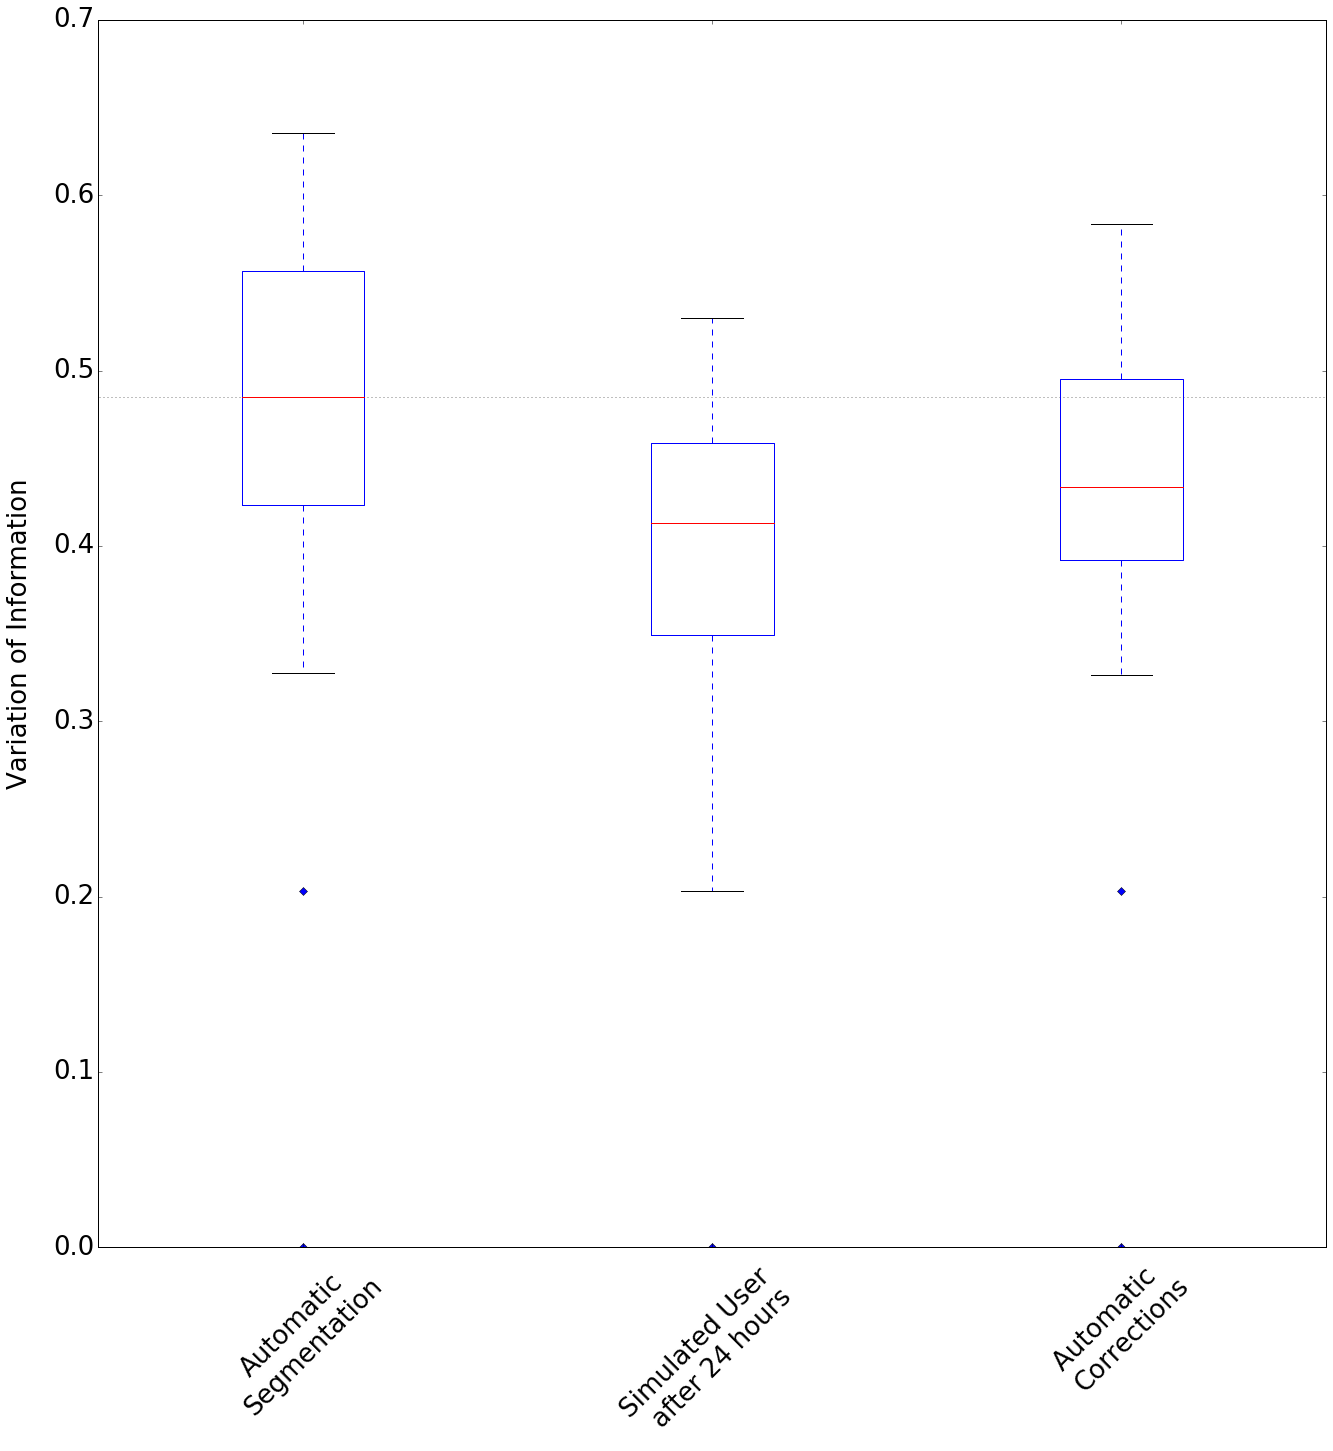

In [49]:
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(range(12), [median_input_vi]*12, 'k:' , color='gray', label='Avg. input VI')

objects = ['Automatic\nSegmentation',
#            'Simulated   \nUser   ',

#            'Simulated User \nafter 30 mins (Old CNN)',        
#            'Simulated User \nafter 30 mins (New CNN)',           
#            'Sim. User after 2h (New CNN)',           
               
           'Simulated User  \nafter 24 hours',
           'Automatic  \nCorrections',           
]

y_pos = range(1,len(objects)+1)


plt.ylabel('Variation of Information', labelpad=20)

plt.setp(plt.xticks()[1], rotation=45)

font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
plt.boxplot(data, 0, 'gD', whis=1.5 ,showfliers=True)
plt.xticks(y_pos, objects)
# plt.savefig('/tmp/out_limit.pdf')

plt.show()